# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [692]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [709]:
# Change type and format of Date column
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Remove $ sign and change type to float
df['State Bottle Cost'] = [float(i.replace('$','')) for i in df['State Bottle Cost'][:len(df)]]
df['State Bottle Retail'] = [float(i.replace('$','')) for i in df['State Bottle Retail'][:len(df)]]
df['Sale (Dollars)'] = [float(i.replace('$','')) for i in df['Sale (Dollars)'][:len(df)]]

# Drop unwanted column
df.drop('Volume Sold (Gallons)',axis=1,inplace=True)

# Change column names
df.columns = ['date', 'store_number','city','zip_code','county_number','county',
              'category','cat_name','vendor','item_number','item_desc','btl_vol',
              'btl_cost','btl_retail','btls_sold','sale','vol_sold']

# Add Year and Month Columns 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 19 columns):
date             270955 non-null datetime64[ns]
store_number     270955 non-null int64
city             270955 non-null object
zip_code         270955 non-null object
county_number    269878 non-null float64
county           269878 non-null object
category         270887 non-null float64
cat_name         270323 non-null object
vendor           270955 non-null int64
item_number      270955 non-null int64
item_desc        270955 non-null object
btl_vol          270955 non-null int64
btl_cost         270955 non-null float64
btl_retail       270955 non-null float64
btls_sold        270955 non-null int64
sale             270955 non-null float64
vol_sold         270955 non-null float64
year             270955 non-null int64
month            270955 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(7), object(5)
memory usage: 39.3+ MB


In [694]:
# Creating Dataframe with required numeric columns
ndf = df[['year','month','store_number','btl_vol','btl_retail','btls_sold','sale','vol_sold']]

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

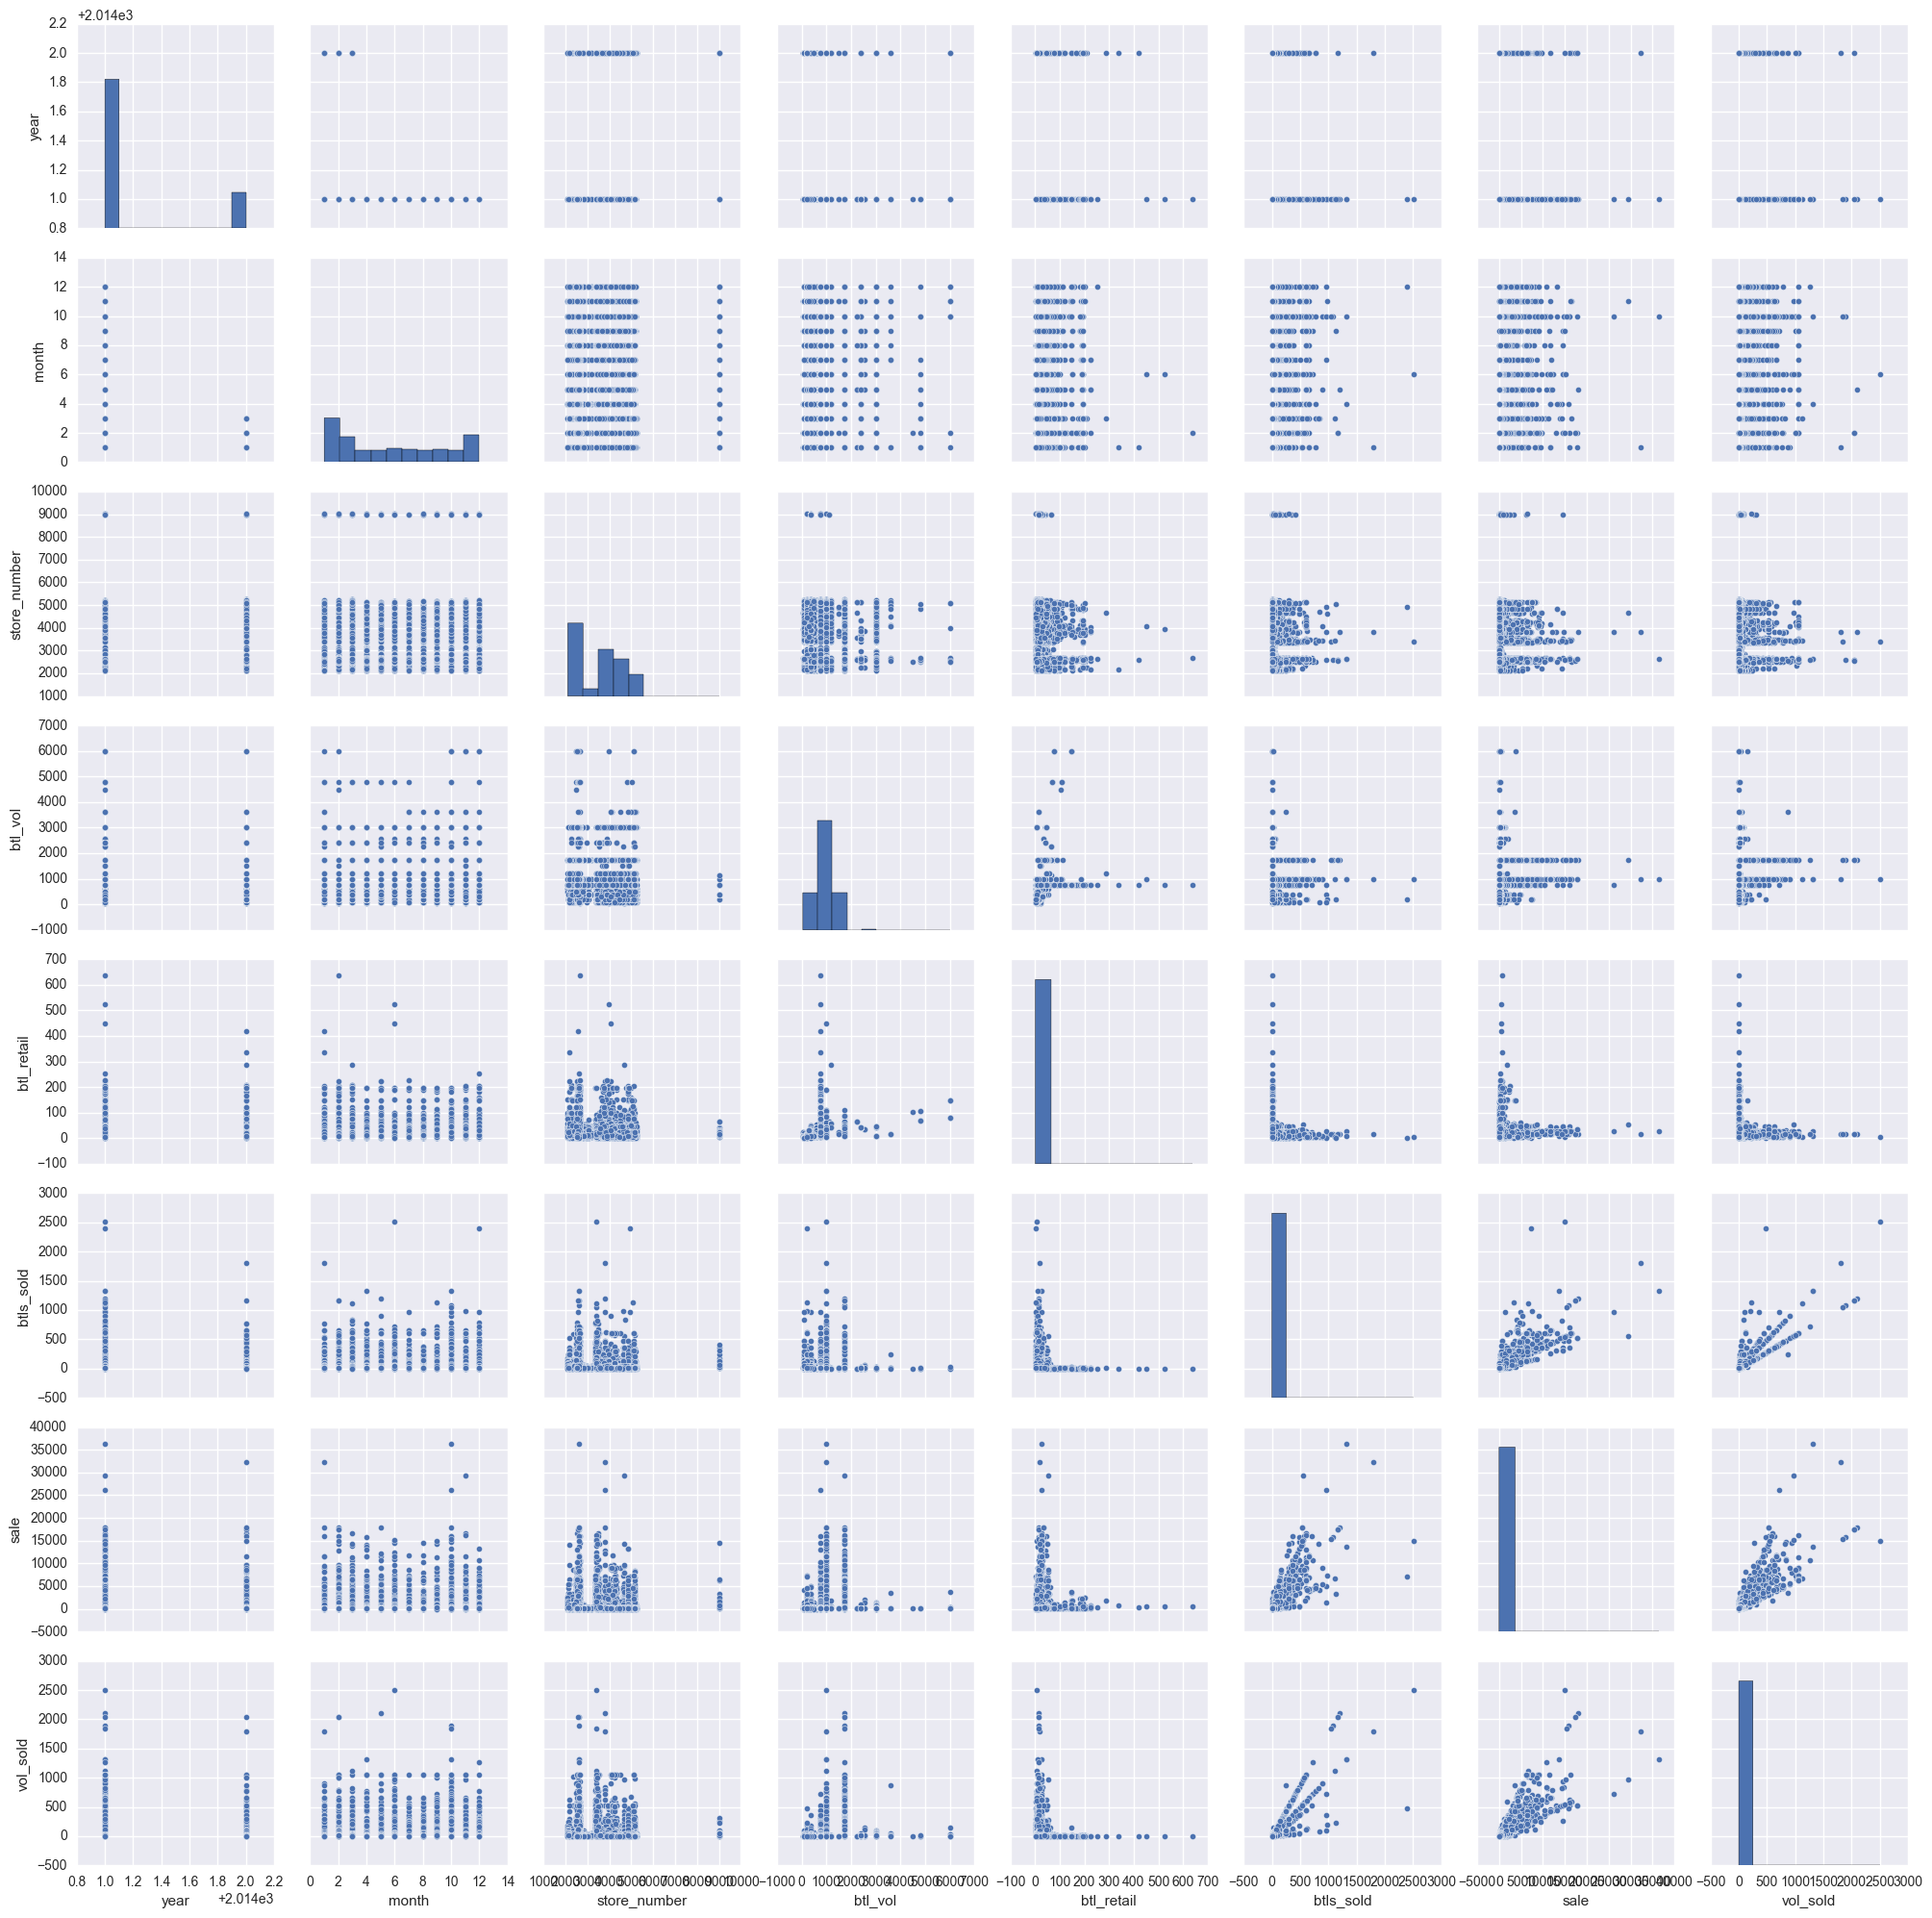

In [695]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(ndf)
plt.show()

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

Linear relationshp is seen between total sales, number of bottles sold and volume sold

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [696]:
# 2015 data
df2015 = ndf[ndf['year'].isin([2015])]

# First quarter sales data per store for 2015 . Rename Column name to qtlysale
SalesQuarter = pd.pivot_table(df2015[df2015['month'] < 4], columns =['store_number'], 
                              values = ['sale','btls_sold'], aggfunc = sum).T
SalesQuarter.columns = ['btls_sold','qtlysale']


# Mean of other Variables for 2015 first quarter.
Vars = pd.pivot_table(df2015[df2015['month'] < 4], columns =['store_number'],
                            values=['btl_vol','btl_retail','vol_sold'],
                            aggfunc = np.mean).T

# Joining First Quarter Sales data and variables 
a = pd.concat([SalesQuarter, Vars], axis=1).dropna()

# Total sales for 2015 per store 
y = df2015.groupby('store_number')['sale'].sum()

# All data for 2015
data2015 = pd.concat([a, y], axis=1).dropna()
data2015.head()

,btls_sold,qtlysale,btl_retail,btl_vol,vol_sold,sale
store_number,,,,,,
2106,2705.0,39287.29,15.075271,886.434109,19.582171,146326.22
2113,196.0,2833.25,15.821190,854.166667,4.216905,9310.22
2130,1533.0,24272.57,15.401379,955.747126,16.635057,111871.43
2152,154.0,2003.46,14.460938,1093.750000,4.741875,7721.08
2178,490.0,5856.41,14.748542,985.937500,8.537708,24324.18


In [697]:
# 2016 data
df2016 = ndf[ndf['year'].isin([2016])]

# First quarter sales data per store for 2016. Rename Column name to qtlysale
SalesQuarter16 = pd.pivot_table(df2016[df2016['month'] < 4], columns =['store_number'], 
                                values = ['sale','btls_sold'], aggfunc = sum).T
SalesQuarter16.columns = ['btls_sold','qtlysale']

# Mean of other Variables for 2016.
Vars16 = pd.pivot_table(df2016[df2016['month'] < 4], columns =['store_number'],
                            values=['btl_vol','btl_retail','vol_sold'],
                            aggfunc = np.mean).T

data2016 = pd.concat([SalesQuarter16, Vars16], axis=1).dropna()

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

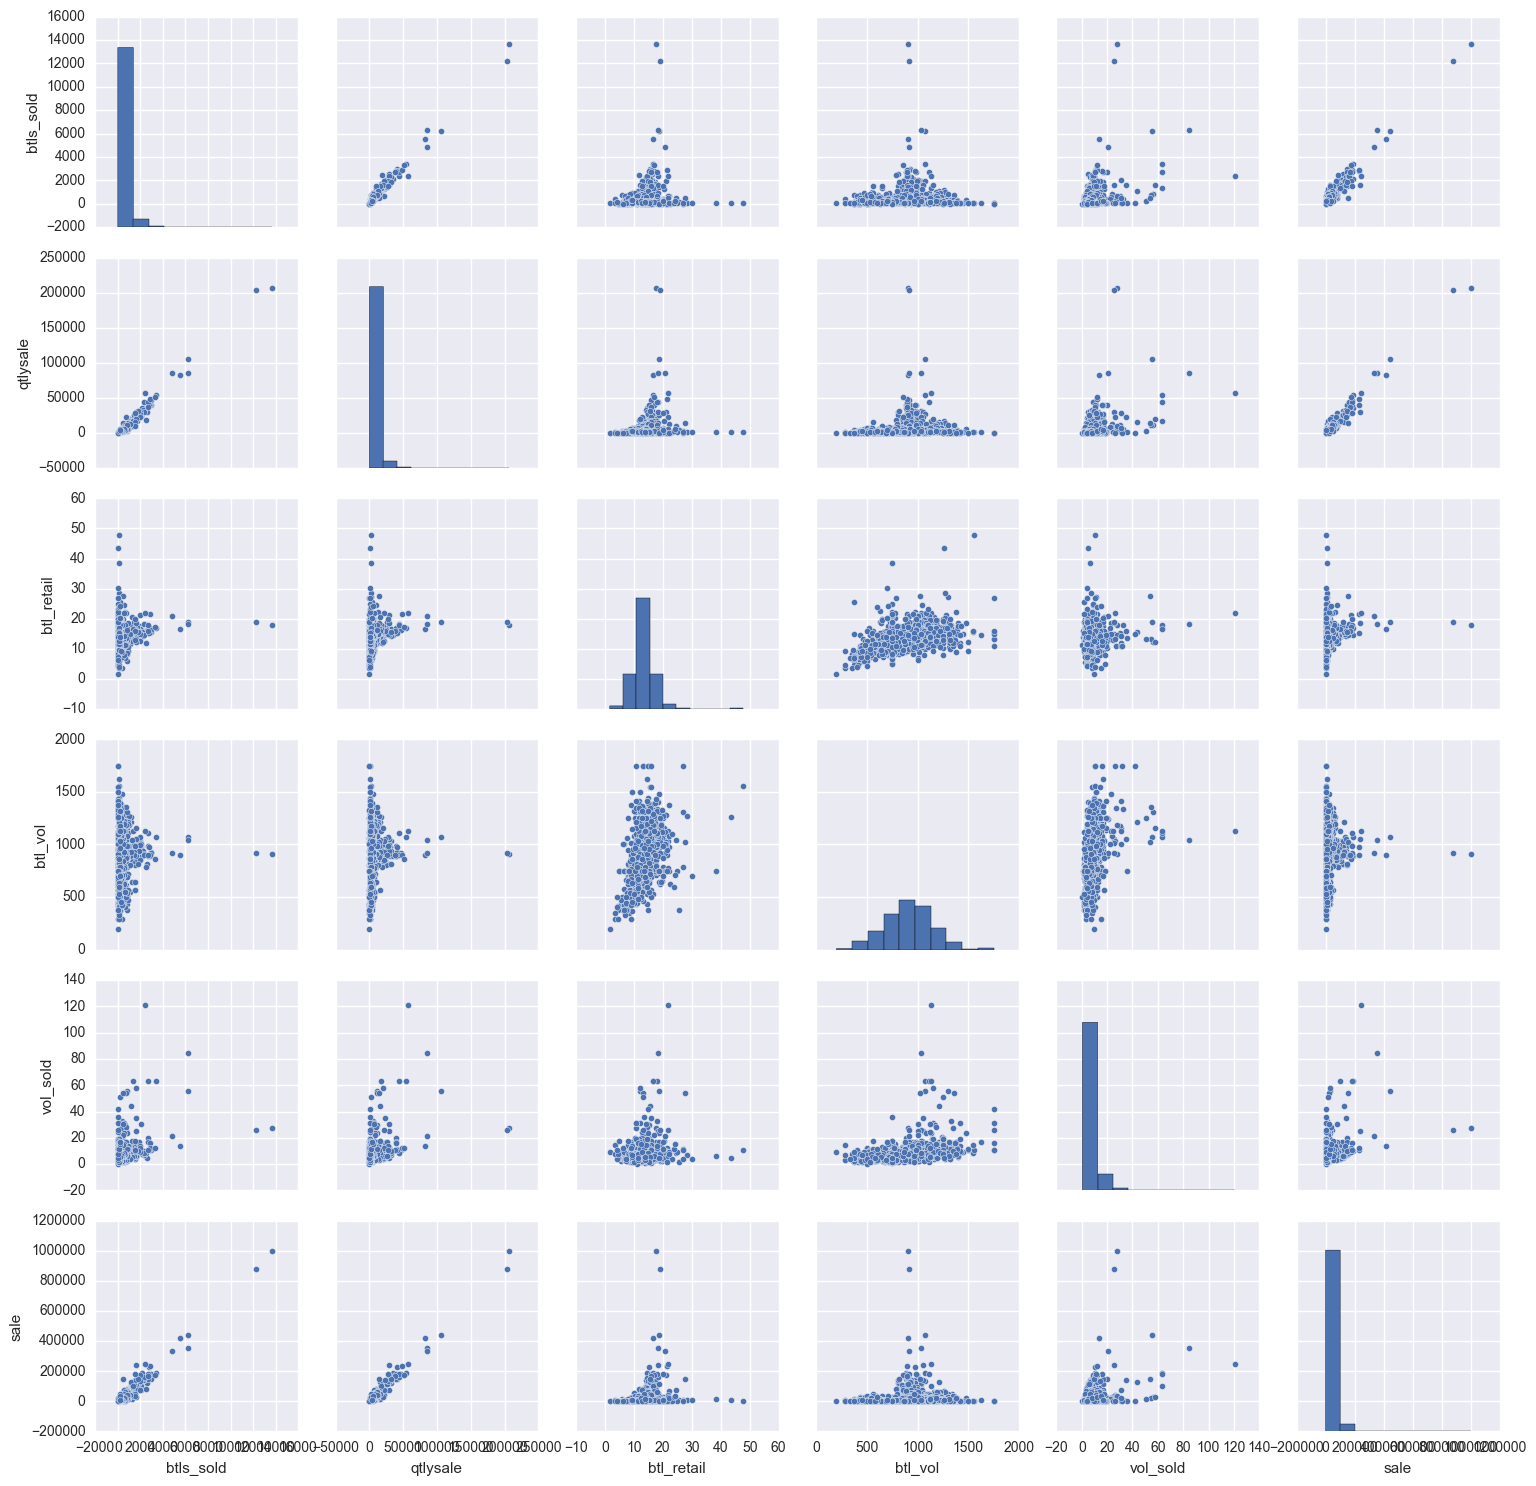

In [698]:
sns.pairplot(data2015)
plt.show()

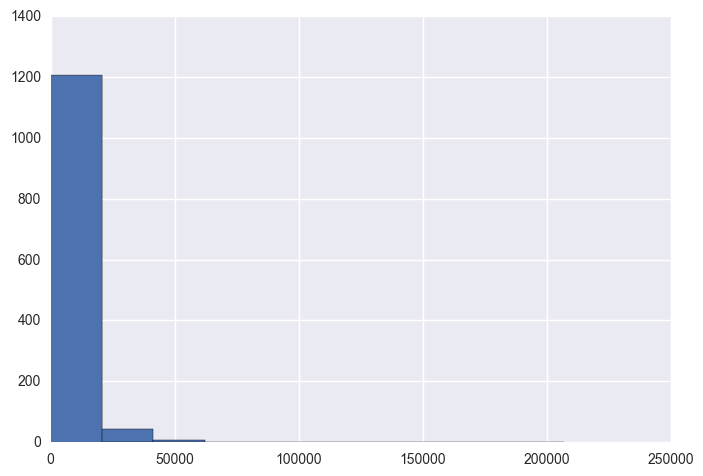

In [699]:
data2015.qtlysale.hist()
plt.show()

Outliers are seen in quartely sale and total sales per store data. Couple of stores have very high sales compared to the other stores. 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [700]:
from sklearn import linear_model, preprocessing
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

lm = linear_model.LinearRegression()

Accuracy for qtlysale : 0.963255623418
Accuracy for all vars: 0.963813219477
Accuracy for all vars: 0.963991794848
MSE for all vars: 1962652599.83
MAE for all vars : 17356.2158726


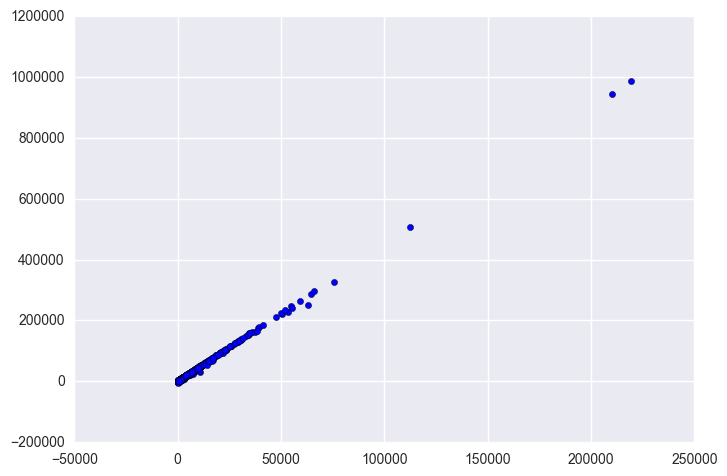

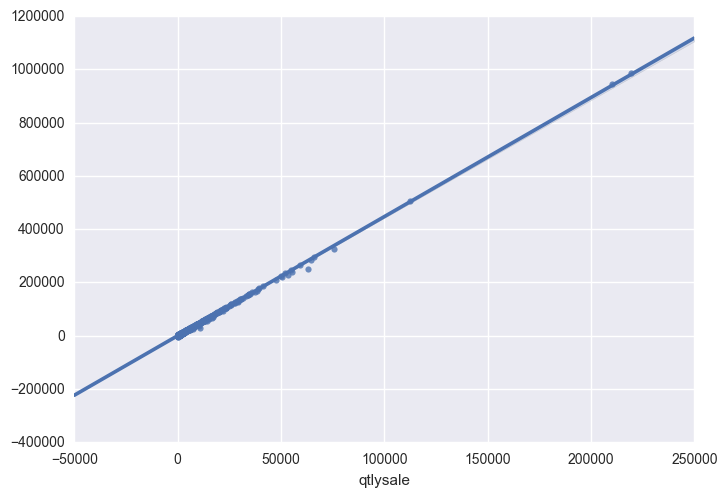

In [715]:
X = data2015[['qtlysale']]
y = data2015['sale']
X_test = data2016[['qtlysale']]
y_test = data2016.qtlysale

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Accuracy for qtlysale :", accuracy

predictions = model.predict(X_test)
# print "MSE for qtlysale :", mean_squared_error(y_test, predictions)
# print "MAE for qtlysale :", mean_absolute_error(y_test, predictions)
# sns.regplot(y_test, predictions)
# plt.show()

# 3 variables
X = data2015[['qtlysale','btls_sold', 'vol_sold']]
y = data2015['sale']
X_test = data2016[['qtlysale','btls_sold', 'vol_sold']]
y_test = data2016.qtlysale

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Accuracy for all vars:", accuracy

predictions = model.predict(X_test)
# print "MSE for 3 variables:", mean_squared_error(y_test, predictions)
# print "MAE for 3 variables :", mean_absolute_error(y_test, predictions)
# sns.regplot(y_test, predictions)
# plt.show()

# For all Variables
X = data2015[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']]
y = data2015['sale']
X_test = data2016[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']]
y_test = data2016.qtlysale

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Accuracy for all vars:", accuracy

predictions = model.predict(X_test)

print "MSE for all vars:", mean_squared_error(y_test, predictions)
print "MAE for all vars :", mean_absolute_error(y_test, predictions)

plt.scatter(y_test, predictions)
plt.show()
sns.regplot(y_test, predictions)
plt.show()

In [720]:
data2016['Predictions Sale'] = predictions

print sum(df.sale)
print sum(predictions)
data2016.head()

34926742.95
29060917.5782


,btls_sold,qtlysale,btl_retail,btl_vol,vol_sold,Predictions Sale
store_number,,,,,,
2106,2220.0,30523.75,15.614567,935.039370,16.675197,136908.458258
2113,159.0,2065.90,16.077297,986.486486,4.783784,10483.342204
2130,1726.0,27856.11,15.932308,955.769231,13.306838,124788.702887
2152,136.0,1376.43,12.711667,1066.666667,4.671000,7385.825970
2178,480.0,5588.50,13.915345,1054.741379,8.979310,25764.067896


r^2: 0.963991794848


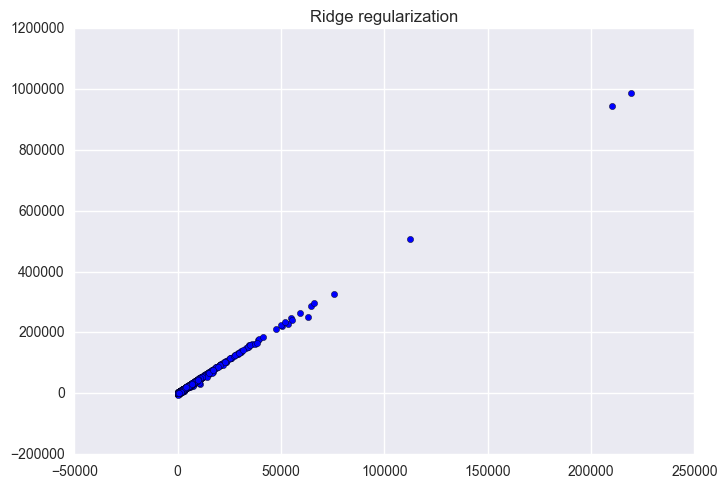

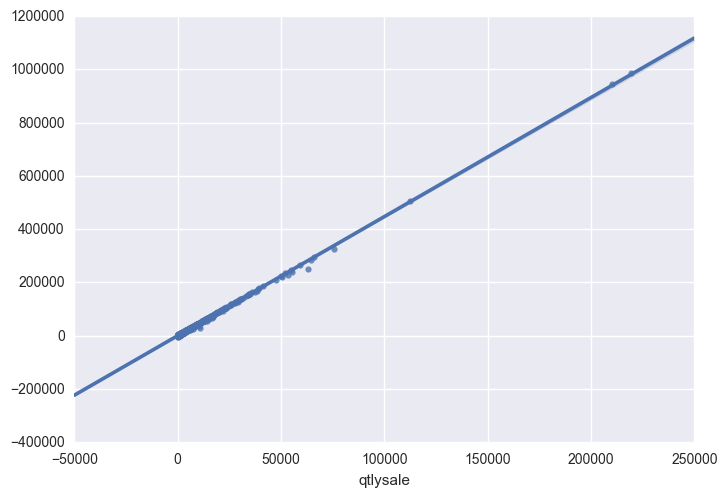

In [702]:
rlm = linear_model.Ridge()

# Fit the polynomial again with ridge regularization
ridge_model = rlm.fit(X, y)

print "r^2:", ridge_model.score(X, y)

predictions = ridge_model.predict(X_test)

plt.scatter(y_test, predictions)
plt.title("Ridge regularization")
plt.show()
sns.regplot(y_test, predictions)

plt.show()

In [711]:
# Removing Outliers from the Dataset. 

outrv2015 = data2015[data2015.qtlysale < 20000]

outrv2016 = data2016[data2016.qtlysale < 20000]

Cross-Predicted Accuracy for qtlysale : 0.842756417642
Cross-Predicted Accuracy for all vars: 0.844006233918
Cross-Predicted Accuracy for all vars: 0.844020000268
MSE with all the Variables: 292199262.732
MAE with all the Variables: 11086.9665528


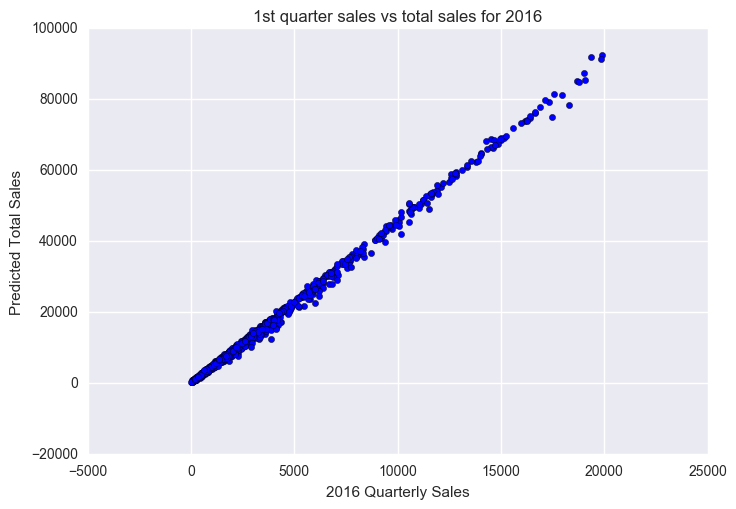

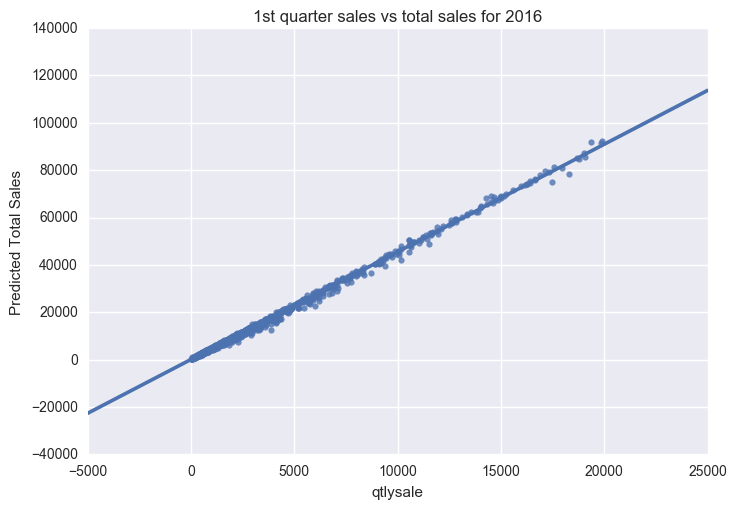

In [721]:
X = outrv2015[['qtlysale']]
y = outrv2015['sale']
X_test = outrv2016[['qtlysale']]
y_test = outrv2016.qtlysale

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Cross-Predicted Accuracy for qtlysale :", accuracy

predictions = model.predict(X_test)
# print "MSE for qtlysale :", mean_squared_error(y_test, predictions)
# print "MAE for qtlysale :", mean_absolute_error(y_test, predictions)
# sns.regplot(y_test, predictions)
# plt.show()

# 3 variables
X = outrv2015[['qtlysale','btls_sold', 'vol_sold']]
y = outrv2015['sale']
X_test = outrv2016[['qtlysale','btls_sold', 'vol_sold']]
y_test = outrv2016.qtlysale

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Cross-Predicted Accuracy for all vars:", accuracy

predictions = model.predict(X_test)
# print "MSE for 3 variables:", mean_squared_error(y_test, predictions)
# print "MAE for 3 variables :", mean_absolute_error(y_test, predictions)

# sns.regplot(y_test, predictions)
# plt.show()


# All Variables
X = outrv2015[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']]
y = outrv2015['sale']
X_test = outrv2016[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']]

y_test = outrv2016.qtlysale

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Cross-Predicted Accuracy for all vars:", accuracy

predictions = model.predict(X_test)


print "MSE with all the Variables:", mean_squared_error(y_test, predictions)
print "MAE with all the Variables:", mean_absolute_error(y_test, predictions)

plt.scatter(y_test, predictions)
plt.title("1st quarter sales vs total sales for 2016")
plt.xlabel("2016 Quarterly Sales")
plt.ylabel("Predicted Total Sales")
plt.show()
sns.regplot(y_test, predictions)
plt.title("1st quarter sales vs total sales for 2016")
plt.ylabel("Predicted Total Sales")
plt.show()

r^2: 0.844020000268


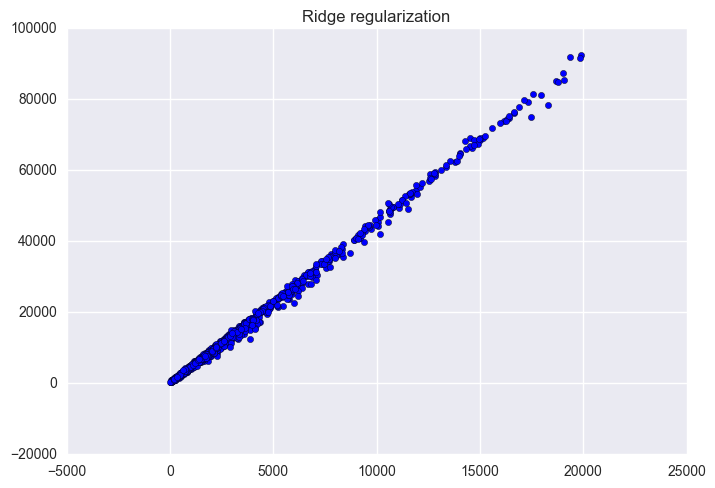

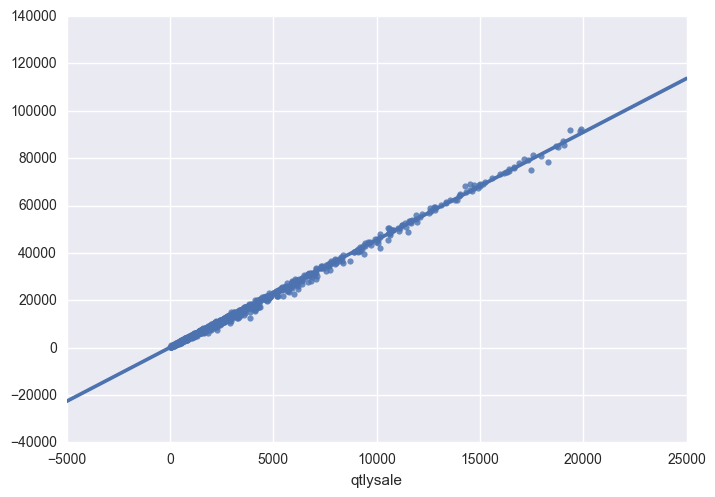

In [706]:
# Ridge Regularization
rlm = linear_model.Ridge()

# Fit the polynomial again with ridge regularization
ridge_model = rlm.fit(X, y)

print "r^2:", ridge_model.score(X, y)

predictions = ridge_model.predict(X_test)

plt.scatter(y_test, predictions)
plt.title("Ridge regularization")
plt.show()
sns.regplot(y_test, predictions)

plt.show()

In [731]:
# Cross Validation
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores

predictionscv = cross_val_predict(lm, X, y, cv=5)


# print "MSE for all vars:", mean_squared_error(y_test, predictionscv)
# print "MAE for all vars :", mean_absolute_error(y_test, predictionscv)

# sns.regplot(y_test, predictionscv)
# plt.title("Cross Validation")
# plt.show()
# plt.scatter(y_test, predictionscv)
# plt.title("Cross Validation")
# plt.show()

Cross-validated scores: [ 0.94647232  0.92048393  0.81276189  0.84437814  0.97876272  0.82121717]


array([ 2.6821545 , -0.16516962,  1.53806667, ..., -0.26535117,
       -0.05557115, -0.14888797])

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

Cross-Predicted Accuracy for all vars: 0.963991794848
MSE for all vars: 0.00112265691308
MAE for all : 0.0155455148265


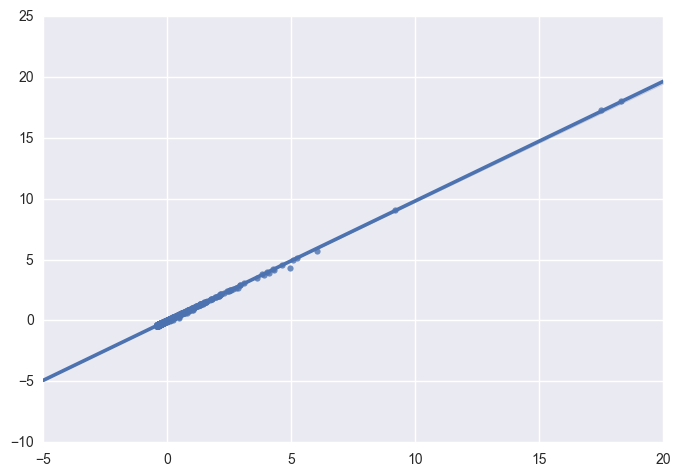

In [723]:
# Feature Scaling

scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(data2015[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']])
y = scaler.fit_transform(data2015['sale'])
X_test = scaler.fit_transform(data2016[['qtlysale', 'btl_retail', 'btl_vol', 'btls_sold', 'vol_sold']])
y_test = scaler.fit_transform(data2016.qtlysale)

model = lm.fit(X, y)
accuracy = model.score(X,y)
print "Cross-Predicted Accuracy for all vars:", accuracy

predictions = model.predict(X_test)
print "MSE for all vars:", mean_squared_error(y_test, predictions)
print "MAE for all :", mean_absolute_error(y_test, predictions)
sns.regplot(y_test, predictions)
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
https://shettydatascience.wordpress.com/2016/10/24/linear-regression-market-research/